In [ ]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
!unzip TP1-2-data.zip

!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2/tools.py

--2020-10-30 21:08:11--  http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86446976 (82M) [application/zip]
Saving to: ‘TP1-2-data.zip’

TP1-2-data.zip      100%[===================>]  82.44M  16.5MB/s    in 5.7s    

2020-10-30 21:08:17 (14.6 MB/s) - ‘TP1-2-data.zip’ saved [86446976/86446976]

Archive:  TP1-2-data.zip
   creating: data/
   creating: data/Scene/
   creating: data/Scene/PARoffice/
 extracting: data/Scene/PARoffice/image_0091.jpg  
 extracting: data/Scene/PARoffice/image_0167.jpg  
  inflating: data/Scene/PARoffice/image_0037.jpg  
 extracting: data/Scene/PARoffice/image_0135.jpg  
 extracting: data/Scene/PARoffice/image_0015.jpg  
 extracting: data/Scene/PARoffice/image_0182.jpg  
 extracting: data/Scene/PARoffice/image_0064.jpg  
 extracting: data/Scene/PARoffice/im

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

import numpy as np
%run 'tools.py'
from os.path import join

data_path = "data"

# Partie 1 : SIFT

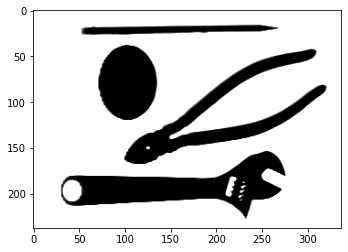

In [ ]:
# example images
I = read_grayscale(join(data_path, 'tools.tiff'))
I2 = read_grayscale(join(data_path, 'Scene/CALsuburb/image_0205.jpg'))
plt.imshow(I)

(238, 337)
(238, 337)


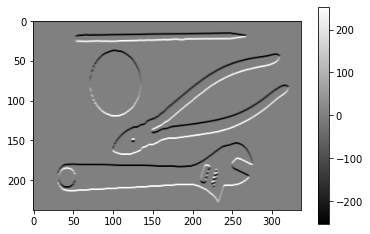

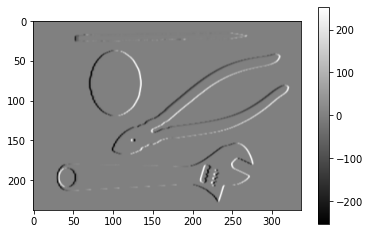

In [ ]:
def compute_grad(I):
    #####################
    ## Votre code ici  ##
    #####################
    hx = 0.5 * np.array([1,0,-1]).reshape((3,1))
    hy = 0.5 * np.array([-1,-2,-1]).reshape((3,1))
    Ix = conv_separable(I,hy,hx)
    Iy = conv_separable(I,hx,hy)
    ####################
    ##      FIN        #
    ####################
    return Ix, Iy

# example d'affichage du résultat
Ix, Iy = compute_grad(I)
print(Ix.shape)
print(Iy.shape)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [ ]:
def discretize(x):
  steps = np.arange(0,360,45)
  n = len(steps)
  i = 0
  while True:
    elt = steps[i]
    if i == n-1:
      break
    if elt>x:
      i -= 1
      break
    i += 1
  return max(i,0)

discretizeVect = np.vectorize(discretize)

In [ ]:
def compute_grad_mod_ori(I):
    #####################
    ## Votre code ici  ##
    #####################
    Ix, Iy = compute_grad(I)
    Gn = np.sqrt(Ix**2 + Iy**2)
    Go = compute_grad_ori(Ix, Iy, Gn)
    ####################
    ##      FIN        #
    ####################
    return Gn, Go

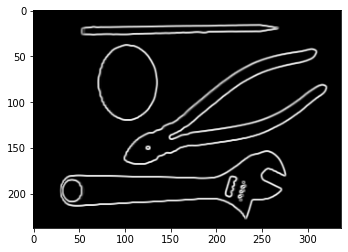

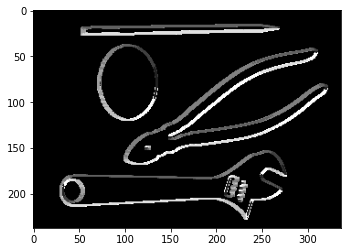

In [ ]:
Gn, Go = compute_grad_mod_ori(I)
plt.imshow(Gn)
plt.show()
plt.imshow(Go)
plt.show()

In [ ]:
def compute_histogram(g_n, g_o):
    """
    g_n and g_o are 4x4 matrices that contain the norm, and the discretized orientation.
    Warning: g_o can contain -1, those values should be discarded.
    """
    hist = np.zeros((8))
    for x in range(4):
      for y in range(4):
        #print(g_o.shape)
        #print(g_n.shape)
        elt = g_o[x][y]
        hist[elt] += np.sum(g_n[x][y]) 
    ####################
    ##      FIN        #
    ####################
    return hist
  

In [ ]:
def compute_sift_region(Gn, Go, mask=None):
    t_min=.5
    t_max=.2
    with_l2 = True
    
    patch_size = 16
    sift = np.zeros((128)) 

    if mask is not None:
        Gn = Gn * mask

    max_x,max_y = Gn.shape
    
    idx = 0
    for k in range(0, patch_size, 4):
        for l in range(0, patch_size, 4):
            """if l+4>=max_x or k+4>=max_y:
              continue"""
            hist = compute_histogram(Gn[l:l+4,k:k+4], Go[l:l+4,k:k+4])   
            sift[idx:idx+8] = hist
            idx += 8

    norm = np.linalg.norm(sift, ord=2)
    # min thresholding on norm
    if norm <= t_min:
        return np.zeros((128))
    # l2-normalization
    if with_l2:
        sift = sift / norm
    # max thresholding on values
    sift[sift >= t_max] = t_max
    # l2-normalization
    if with_l2:
        norm = np.linalg.norm(sift, ord=2)
        sift = sift / norm
    return sift

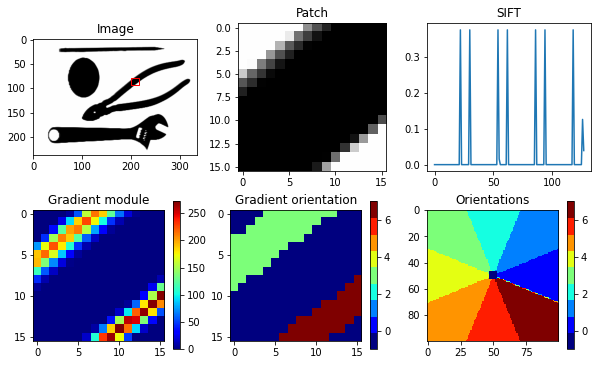

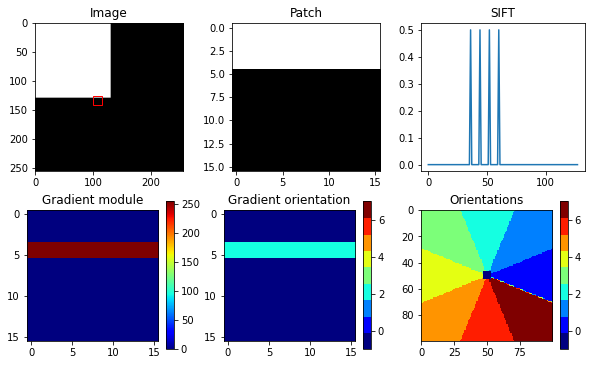

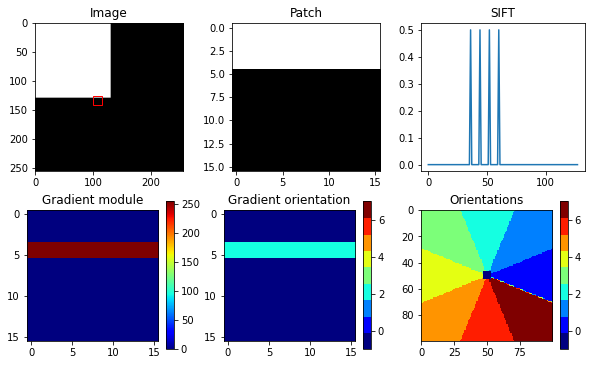

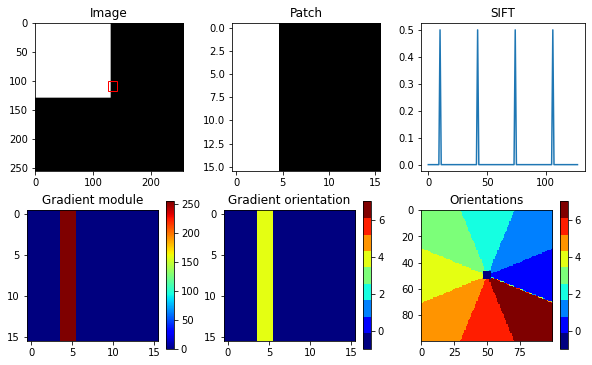

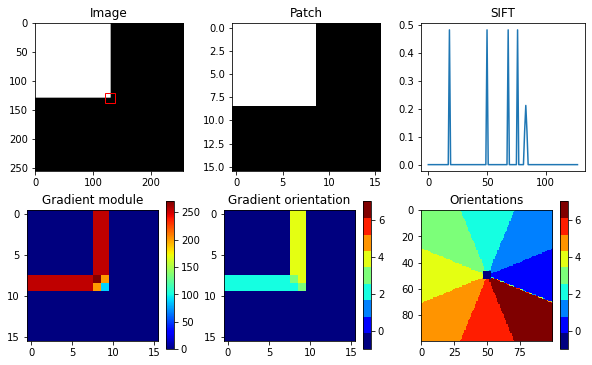

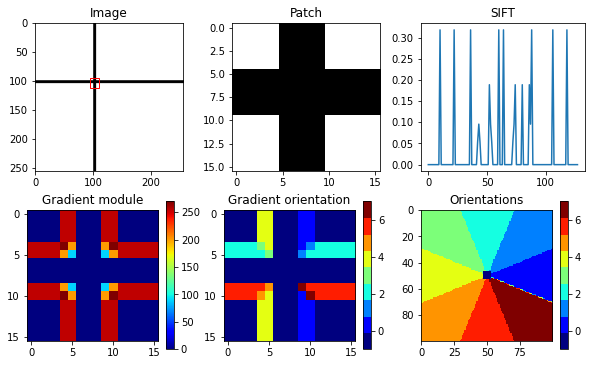

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3181317 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3181317 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18864812, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.3181317 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.18864

In [ ]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

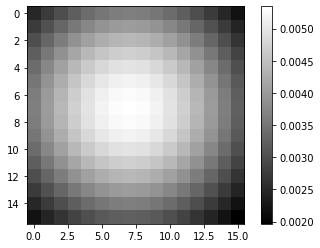

(238, 337)
[  0   8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128 136
 144 152 160 168 176 184 192 200 208 216 224 232]
[  0   8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128 136
 144 152 160 168 176 184 192 200 208 216 224 232 240 248 256 264 272 280
 288 296 304 312 320 328 336]
(238, 337)


In [ ]:
plt.imshow(gaussian_mask())
plt.colorbar()
plt.savefig("gaussian")
plt.show()
x, y = dense_sampling(I)
print(I.shape)
print(x)
print(y)
print(Gn.shape)

In [ ]:
arr = [1,2,3,4,5,6,7,8,9]
print(Gn.shape)

(238, 337)


In [ ]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    #####################
    ## Votre code ici  ##
    #####################
    # Ici, effectuez les calculs sur l'image globale (norme, gradients)
    Gn, Go = compute_grad_mod_ori(im)
    max_x, max_y = Gn.shape
    ####################
    ##      FIN        #
    ####################

    sifts = np.zeros((len(x), len(y), 128))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #####################
            ## Votre code ici  ##
            #####################
            sifts[i, j, :] = compute_sift_region(Gn[xi:xi+16,yj:yj+16],Go[xi:xi+16,yj:yj+16]) # TODO SIFT du patch de coordonnee (xi, yj)
            ####################
            ##      FIN        #
            ####################

    return sifts

# Compute SIFT

Le calcul durera plusieurs minutes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

max_images_per_class = 10  # You can change this to None to compute the whole dataset (takes quite some time)

save_path = "/content/gdrive/My Drive/rdfia/"
dir_sc = os.path.join(data_path, 'Scene')
dir_sift = os.path.join(save_path, 'sift')
inames, ilabls, cnames = load_dataset(dir_sc, images_per_class=max_images_per_class)
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


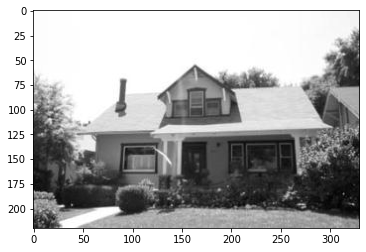

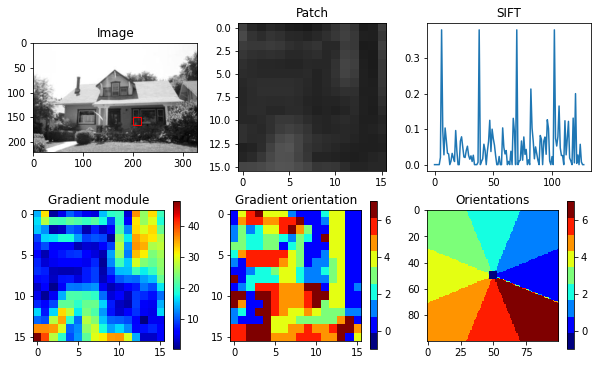

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0202169 , 0.37981886, 0.09572997, 0.02761574, 0.10332907,
       0.0695537 , 0.03214231, 0.03012209, 0.        , 0.01000085,
       0.03170517, 0.0196418 , 0.0087838 , 0.09611869, 0.03878772,
       0.        , 0.        , 0.06632236, 0.0784634 , 0.05112623,
       0.02150763, 0.02011151, 0.0399208 , 0.05196342, 0.02593218,
       0.01539673, 0.02475083, 0.00888029, 0.02649895, 0.        ,
       0.        , 0.        , 0.00639314, 0.37981886, 0.        ,
       0.0093292 , 0.01623287, 0.05758242, 0.040388  , 0.        ,
       0.03860335, 0.06558197, 0.12496982, 0.03700534, 0.09996065,
       0.0734451 , 0.05489254, 0.02505015, 0.        , 0.        ,
       0.02297768, 0.        , 0.        , 0.10355072, 0.04854808,
       0.03019366, 0.03968438, 0.        , 0.0091207 , 0.        ,
       0.03767882, 0.        , 0.13050733, 0.09336623, 0.        ,
       0.37981886, 0.        , 0.00990374, 0.01250106, 0.06661

In [ ]:
I3 = read_grayscale(join(data_path, "Scene/"+inames[0]))
mplt.imshow(I3)
display_sift_region(I3,           compute_grad_mod_ori, compute_sift_region, x=200, y=150, gausm=False)

# Partie 2 : Dictionnaire visuel

In [ ]:
from sklearn.cluster import KMeans

path_vdict = os.path.join(save_path, 'kmeans', 'vdict.npy')
os.makedirs(os.path.join(save_path, 'kmeans'), exist_ok=True)

In [ ]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=30, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]

    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector, and return visual dict
    #####################
    ## Votre code ici  ##
    #####################
    kmeans = KMeans(n_clusters=n_clusters, n_init = n_init).fit(sift)
    #kmeans.cluster_centers_.append(np.zeros(elt.shape))
    vdict = kmeans.cluster_centers_
    vdict = np.concatenate([vdict, np.zeros_like(vdict[0:1])], axis=0)
    ####################
    ##      FIN        #
    ####################
    return vdict


In [ ]:
# Run the visual dict computation (saved the first time)
vdict = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)
print(vdict.shape)

Computing or loading visual dict
(76, 128)


In [ ]:
vdict[0].shape

(128,)

(31564, 16, 16)
(31564, 128)


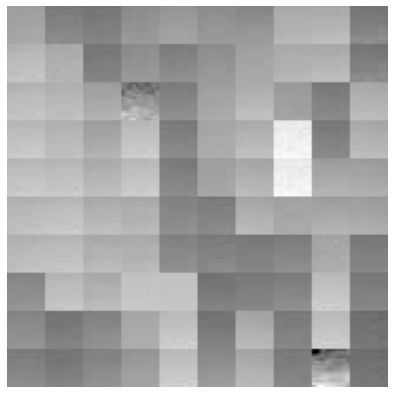

In [ ]:
# Study of the dict

# choose random images
indexes = np.random.randint(0, len(inames), 30)
sifts = [sifts_list_by_image[i] for i in indexes]
chosen_inames = [inames[i] for i in indexes]

regions, sifts = get_regions_and_sifts(dir_sc, chosen_inames, sifts) # Compute SIFT and regions from 30 random images
#display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

cluster0 = vdict[0]
arrayDist=[]
for elt in sifts:
  dist = np.linalg.norm(cluster0-elt)
  arrayDist.append(dist)
arrayDist = np.array(arrayDist)
indexes = np.argsort(arrayDist)[:100]
arraySorted = arrayDist[indexes]
print(regions.shape)
print(sifts.shape)
display_images(regions[indexes]) # Show 100 random regions

# TODO visually analyze the dict through similar example regions
#
# Ideally, create `vdregions`, a numpy array of size 1001 x 16 x 16 where each of the 1001 elements is a
# "prototype" patch that is very close to the cluster center

# Partie 3 : BoW

In [ ]:
# TODO Compute BoW for an image
# indication: scipy.spatial.distance_matrix
from scipy.spatial.distance import cdist
import collections


def compute_feats(vdict, image_sifts):
    """
    vdict: (num_clusters, 128): visual dictionnary containing all clusters.
    image_sifts: (H, W, 128) all sift features from the given image
    """
    # flatten sifts
    sifts = image_sifts.reshape(-1, 128)  # (N, 128)
    ##################### 
    ## Votre code ici  ##
    #####################
    # compute distance from image sifts to vdict
    H = np.argmax(-1*cdist(sifts,vdict),axis=1)
    counter = collections.Counter(H)
    feats = [counter[i] for i in range(vdict.shape[0])]
    ####################
    ##      FIN        #
    ####################
    feats /= np.linalg.norm(feats)
    return feats

In [ ]:
# Visualize your BoW on an image
vdict = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict,75)
iname = inames[113]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
sift = (sift * 255).astype('uint8')
regions = compute_regions(im)
feats = compute_feats(vdict, sift)

display_vdregions_image(im, vdict, sift, feats, vdregions=None) # if you have vdregions, add it as input here

In [ ]:
i=0
for elt in inames:
  print("i",i)
  i += 1
  ipath = os.path.join(dir_sc, elt)
  im = read_grayscale(ipath)
  plt.imshow(im)
  plt.show()

In [ ]:
print(sift.shape)
print(sifts.shape)

In [ ]:
len(inames)

In [ ]:
from scipy.spatial.distance import cdist
import collections
print(cdist(sifts,vdict).shape)
H = np.argmax(-1*cdist(sifts,vdict),axis=1)
counter = collections.Counter(H)
M = [counter[i] for i in range(vdict.shape[0])]
print(M)

In [ ]:
vdict.shape